In [1]:
from pydeeprecsys.rl.manager import MovieLensFairnessManager
from pydeeprecsys.rl.agents.rainbow import RainbowDQNAgent
from pydeeprecsys.rl.learning_statistics import LearningStatistics
import gym
from pydeeprecsys.rl.agents.agent import RandomAgent

training_iterations = 1
training_episodes = 1000

In [3]:
manager = MovieLensFairnessManager(slate_size=1)
rainbow_statistics = []
for i in range(training_iterations):
    stats = LearningStatistics()
    rainbow_agent = RainbowDQNAgent(
        manager.env.observation_space.shape[0],
        manager.env.action_space.n,
        network_update_frequency=5,
        network_sync_frequency=250,
        batch_size=32,
        learning_rate=0.00025,
        discount_factor=0.9,
        buffer_size=10000,
        buffer_burn_in=32,
        statistics=stats
    )
    manager.train(rainbow_agent, max_episodes=training_episodes, statistics=stats)
    rainbow_statistics.append(stats)

Training...
Episode 999 Mean Rewards 38.39 Last Reward 50.00		

In [4]:
manager = MovieLensFairnessManager(slate_size=1)
random_statistics = []
for i in range(training_iterations):
    stats = LearningStatistics()
    random_agent = RandomAgent(gym.spaces.Discrete(3883))
    manager.train(random_agent, max_episodes=training_episodes, statistics=stats)
    random_statistics.append(stats)

Training...
Episode 999 Mean Rewards 31.29 Last Reward 40.20		

In [24]:
from pydeeprecsys.rl.agents.reinforce import ReinforceAgent
manager = MovieLensFairnessManager(slate_size=1)
reinforce_statistics = []
for i in range(training_iterations):
    stats = LearningStatistics()
    reinforce_agent = ReinforceAgent(
        state_size=manager.env.observation_space.shape[0], 
        n_actions=manager.env.action_space.n, 
        discount_factor=0.95,
        learning_rate=0.001)
    manager.train(reinforce_agent, max_episodes=5000, statistics=stats)
    reinforce_statistics.append(stats)

Training...
Episode 4999 Mean Rewards 31.54 Last Reward 25.21		

In [25]:
from pydeeprecsys.rl.agents.actor_critic import ActorCriticAgent
manager = MovieLensFairnessManager(slate_size=1)
ac_statistics = []
for i in range(training_iterations):
    stats = LearningStatistics()
    ac_agent = ActorCriticAgent(
        state_size=manager.env.observation_space.shape[0], 
        n_actions=manager.env.action_space.n, 
        discount_factor=0.99,
        learning_rate=0.00025)
    manager.train(ac_agent, max_episodes=5000, statistics=stats)
    ac_statistics.append(stats)

Training...
Episode 4999 Mean Rewards 31.75 Last Reward 19.76		

In [26]:
import pandas
metrics = pandas.DataFrame()
for i in range(len(rainbow_statistics)):
    stats = pandas.DataFrame(rainbow_statistics[i].collected_metrics)
    stats['model'] = 'DuelingDQN'
    metrics = pandas.concat([metrics, stats])
for i in range(len(random_statistics)):
    stats = pandas.DataFrame(random_statistics[i].collected_metrics)
    stats['model'] = 'RandomAgent'
    metrics = pandas.concat([metrics, stats])
for i in range(len(reinforce_statistics)):
    stats = pandas.DataFrame(reinforce_statistics[i].collected_metrics)
    stats['model'] = 'REINFORCE'
    metrics = pandas.concat([metrics, stats])
for i in range(len(ac_statistics)):
    stats = pandas.DataFrame(ac_statistics[i].collected_metrics)
    stats['model'] = 'ActorCritic'
    metrics = pandas.concat([metrics, stats])

metrics.to_csv('output/all_metrics_test.csv')

# Plot Comparison

In [27]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
metrics = pandas.read_csv('output/all_metrics_test.csv', index_col=0)
metrics = metrics.query('metric=="moving_rewards"').reset_index(drop=True)
metrics['measurement'] = metrics.measurement.astype(float)


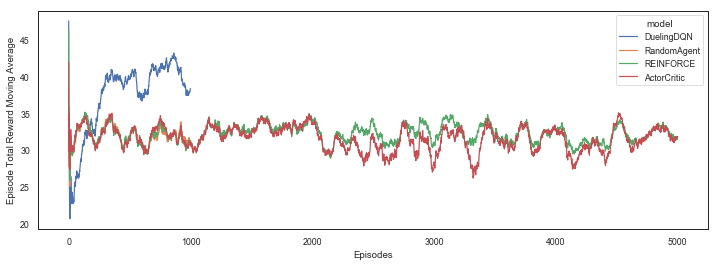

In [29]:
sns.set(rc={'figure.figsize':(12,4)})
sns.set_context("paper")
sns.set_style("white")
sns.color_palette("Set2")
plot = sns.lineplot(data=metrics, x="episode", y="measurement", hue='model', ci=95, legend='full')
plot.set(xlabel='Episodes', ylabel='Return Moving Average (100)')
plt.savefig("output/preliminary_results.pdf")